## Project 2. Clustering using k-means

### Student ID: 915030521
### Student Name: Chenghan Sun

### Note: I noticed our TA Lingfei that after I finished my notebook, I had to run my code on another machine since I can't install the Basemap on my laptop. 

In [1]:
# All Import Statements Defined Here
# Note: Do not change anything

import numpy as np
import math
import matplotlib.pyplot as plt

# Do not use any other packages below here in your code before part 4
# install Basemap before you start

import pandas as pd
from mpl_toolkits.basemap import Basemap
from pylab import rcParams
from sklearn.preprocessing import StandardScaler

%matplotlib inline

## Part 1. Implementing k-means algorithm

Complete what is missing to implement the k means algorithm.

In [2]:
class k_means:
    
    def __init__(self, data: np.ndarray, d: int, k: int , tol: float, max_iter: int):
        """
        data: data to cluster
        d:dimension of the data
        k: prespecified number of clusters
        tol: convergence criterion
        max_iter: maximum number of iterations allowed
        """
        self.partitions={i:[] for i in range(k) }
        self.labels=[] # list of numbers with values from 0 to k-1
        self.d=d
        self.n=data.shape[0]  # num of samples: 180
        self.counter=0
    
        ### your code starts here
        self.k = k
        self.tol = tol
        self.max_iter = max_iter
        self.data = data
        # self.update_flag = True
        self.centers = None
        self.cost = 0
        ### end of your code
    
    def initialize_centers(self, method: int):
        """
        method = 1:
        randomly pick k points from the data as centers
        """
        if method==0:
            self.centers=data[:self.k,:]
            
        elif method==1:
        ### your code starts here
            # K initial centers are generated at random
            # select random data points w/o replacement
            self.set_k(self.k)
            rand_index = np.random.choice(self.n, self.k, replace=False) 
            self.centers = self.data[rand_index, :]
            return self.centers
        else:
            raise ValueError("Method needs to be either 0 or 1")
        ### end of your code
        
    def search(self):
        """
        update the partitions and the next centers;
        here we use centroids for k-means method
        """
        self.partitions={i:[] for i in range(self.k)}
        self.next_centers=np.array([])
        
        ### your code starts here
        # update the partitions
        for sample in range(self.n):  # loop through all the samples
            closest_samples = []  # initialize closest samples as a list
            for center in range(self.centers.shape[0]):  # loop through all picked centers
                euc_dist = np.linalg.norm(self.data[sample] - self.centers[center])
                closest_samples.append(euc_dist)
            
            # closest_index = np.argmin(closest_samples) 
            target_sample = np.min(closest_samples)  # use for minimum index checker 
            # get the index/indicies of closest sample
            closest_index = [i for i,j in enumerate(closest_samples) if j == target_sample] 
            
            # in case of multiple closest indicies
            if len(closest_index) != 1:  
                closest_index = int(np.random.choice(closest_index, 1))
            self.partitions[closest_index[0]].append(sample)  # update new partitions
            
        # update the next centers
        next_centers_list = []  # list of new centers 
        for i in range(len(self.centers)):  # loop through the number of clusters
            partitions_index = self.partitions[i]
            selected_centers = self.data[partitions_index]  # find each new "center"
            mean_dist = np.mean(selected_centers, axis=0)
            next_centers_list.append(mean_dist)
        self.next_centers = np.array(next_centers_list)  # form the new centers 
        ### end of your code
        
    def is_updated(self):
        """
        return True if update is done, but has not yet converged; False otherwise;
        the convergence criterion is the sum of absolute relative differences (between self.centers and 
        self.next_centers) smaller than tol
        """
        
        ### your code starts here
        converge_criterion = np.linalg.norm((self.centers - self.next_centers), ord=1)
        #if not self.update_flag:
        #    print("Update_flag needs to be defaulted as True")
            
        if converge_criterion > self.tol:
            return True
        else:
            #self.update_flag = False
            return False
        ### end of your code
        
    def fit_model(self):
        """
        function to fit the k-means algorithms using the above functions
        """
        self.initialize_centers(1)  # method = 1 
        ### your code starts here
        for it in range(self.max_iter):  # perform iterations 
            self.search()
            # print(self.update_flag)
            if not self.is_updated():
                print(f"The K-means algorithm is converged at iteration number = {it}")
                break
            self.centers = self.next_centers  # update new center
        ### your code ends here
        self.get_labels()

    def set_k(self,k):
        self.k=k
    
    # not used but changed as Lingfei mentioned 
    def predict(self,pt):
        distances = [ numpy.linalg.norm( pt-c ) for c in self.centers ]
        cluster_label = distances.index( min(distances) )
        return cluster_label

    def get_labels(self):
        ### your code starts here
        self.labels = np.empty(self.n)
        for center in range(len(self.centers)):  # loop through all picked centers
            # print(self.partitions[center])
            for closest_index in self.partitions[center]:
                self.labels[closest_index] = center  # assign labels 
        self.labels = np.array(self.labels)
        ### end of your code
        return self.labels
    
    def get_centers(self):
        return self.centers
    
    def get_clusters(self):
        return self.partitions

    def get_cost(self):
        """
        Here we use within cluster sum of squares as cost 
        """
        ### your code starts here
        self.cost = 0  # reset cost for cost plot 
        for sample in range(self.n):  # loop through all the samples
            label = int(self.labels[sample])  # label index
            iter_cost = np.linalg.norm(self.data[sample] - self.centers[label])**2
            self.cost += iter_cost
        print(f"The cost of this experiment = {self.cost}")
        ### end of your code
        return self.cost
        
    def plot_clusters(self):
        if self.d>2:
            print("Dimension too large!")
            return 
        if self.labels==[]:
            self.fit_model()
        plt.scatter( self.data[:,0] , self.data[:,1], c=self.labels, s=3)
        plt.scatter( np.array(self.centers)[:,0],np.array(self.centers)[:,1] ,marker='*',c=list(range(self.k)) ,s=300 )

## Part 2. Implementing criteria to evaluate clustering algorithms

In [3]:
class clustering_eval_metrics:
    def __init__(self, labels: list ,true_labels=None): # label must be between 0 to number_of_labels - 1
        self.labels=np.array(labels)
        self.true_labels=true_labels
        self.cmat=None
        self.ars=None
        
    def set_true_labels(self, true_labels):
        self.true_labels=np.array(true_labels)
        
    def contingency_matrix(self): 
        """
        return a contingency matrix
        """
        ### your code starts here
        # here I referred sklearn.metrics.cluster.contingency_matrix to build my own contingency matrix
        pred_clusters, pred_cluster_index = np.unique(self.labels, return_inverse=True)  # return the indices of ar
        true_clusters, true_clusters_index = np.unique(self.true_labels, return_inverse=True)  # return the indices of ar
        num_pred_clusters = pred_clusters.shape[0]  # get dimension sample size 
        num_true_clusters = true_clusters.shape[0]  # get dimension sample size
        
        # initialize the contingency matrix
        if num_pred_clusters >= num_true_clusters:
            n_clusters = num_pred_clusters
        else:
            n_clusters = num_true_clusters
        self.cmat = np.zeros((n_clusters, n_clusters))
        
        # fill-in the contingency matrix
        for pos in range(len(true_clusters_index)):
            self.cmat[true_clusters_index[pos], pred_cluster_index[pos]] += 1
        ### end of your code
        
        return self.cmat
        
    def adjusted_rand_score(self):
        """
        return ARI/ARS
        """
        ### your code starts here
        # firstly, check input dimensions 
        if self.labels.ndim != 1:
            raise ValueError(
                f"labels_pred must be 1D: shape is: {labels_pred.shape}")
        if self.true_labels.ndim != 1:
            raise ValueError(
                f"labels_true must be 1D: shape is: {labels_true.shape}")
        
        # get labels dimentionalities, similar steps as building contingency_matrix
        num_samples = self.true_labels.shape[0]
        pred_clusters = np.unique(self.labels)
        num_pred_clusters = pred_clusters.shape[0]
        true_clusters = np.unique(self.true_labels)
        num_true_clusters = true_clusters.shape[0]
            
        # calculate ARI using the contingency matrix 
        # using the equation of adjusted Rand index 
        # make a sub-helper function
        def _helper_comb(n):
            return n*(n-1)/2
        
        # Here I referred sklearn.metrics.adjusted_rand_score to for the ARI calculation
        sum_comb_1 = sum(_helper_comb(n1) for n1 in np.ravel(self.cmat.sum(axis=1)))
        sum_comb_2 = sum(_helper_comb(n2) for n2 in np.ravel(self.cmat.sum(axis=0)))
        comb_mean = (sum_comb_1 + sum_comb_2) / 2
        comb_prod = (sum_comb_1 * sum_comb_2) / _helper_comb(num_samples)
        sum_comb = sum(_helper_comb(self.cmat[i][j]) for j in range(len(self.cmat[0])) for i in range(len(self.cmat)))

        self.ars = (sum_comb - comb_prod) / (comb_mean - comb_prod)
        ### end of your code
        return self.ars

## Part 3. k-medoid algorithm

Write a class called pam to implement the k-medoid algorithm. It should have a similar structure as the k_means class as we implemented before. Write the code as concise as possible. Any code that exceeds 40 lines will get penalized.

pam should take one more parameter p. the input will look like

(data: numpy.ndarray, d: int, k: int , tol: float, max_iter: int, p: float)

p indicates whtat Lp norm is used. $ |x|_{L_p}=( x_1^p+\ldots+x_d^p  )^{1/p}  $

In [4]:
### Your code starts here
# In order to control the code within 40 lines, design a new pam class to inherit features from the K-means class 
# change two tings in search algorithm: 1. find median of center rather than mean of center 2. use L-p norm for distance measure
class pam(k_means):
    def __init__(self, data: np.ndarray, d: int, k: int , tol: float, max_iter: int, p: float):
        super().__init__(data, d, k, tol, max_iter)
        self.p = p
        
    def search(self):
        self.partitions={i:[] for i in range(self.k)}
        self.next_centers=np.array([])
        
        # update the partitions
        for sample in range(self.n):  # loop through all the samples
            closest_samples = []  # initialize closest samples as a list
            for center in range(self.centers.shape[0]):  # loop through all picked centers
                euc_dist = np.linalg.norm(self.data[sample] - self.centers[center], ord=self.p)
                closest_samples.append(euc_dist)
            target_sample = np.min(closest_samples)  # use for minimum index checker 
            # get the index/indicies of closest sample
            closest_index = [i for i,j in enumerate(closest_samples) if j == target_sample] 
            # in case of multiple closest indicies
            if len(closest_index) != 1:  
                closest_index = int(np.random.choice(closest_index, 1))
            self.partitions[closest_index[0]].append(sample)  # update new partitions
            
        # update the next centers
        next_centers_list = []  # list of new centers 
        for i in range(len(self.centers)):  # loop through the number of clusters
            partitions_index = self.partitions[i]
            selected_centers = self.data[partitions_index]  # find each new "center"
            mean_dist = np.median(selected_centers, axis=0)
            next_centers_list.append(mean_dist)
        self.next_centers = np.array(next_centers_list)  # form the new centers 
### your code ends here

## Part 4. Simulation Study 

### You may choose not to use the functions written above to finish this part. Then, you automatically lose all the points from Part 1~3.

Sample $60$ data points each from the following distributions each

$$ X_1\sim N\bigg(\begin{pmatrix}
0\\
0\end{pmatrix},\begin{pmatrix}
1 & 0\\
0 & 1 \end{pmatrix}\bigg),X_2\sim N\bigg(\begin{pmatrix}
3\\
2\end{pmatrix},\begin{pmatrix}
2 & 1\\
1 & 1 \end{pmatrix}\bigg)
, X_3\sim N\bigg(\begin{pmatrix}
5\\
0\end{pmatrix},\begin{pmatrix}
2 & 1\\
1 & 1 \end{pmatrix}\bigg) $$

to form a sample of size $180$.  Use numpy.random.multivariate_normal() and set numpy.random.seed(20) in front.

In [5]:
data=np.array([])
true_labels=np.array([])

### your code starts here
np.random.seed(20)  # set seed as required 

# begin simulation data 
sample = 60
X1 = np.random.multivariate_normal([0,0], [[1,0], [0,1]], sample)
X2 = np.random.multivariate_normal([3,2], [[2,1], [1,1]], sample)
X3 = np.random.multivariate_normal([5,0], [[2,1], [1,1]], sample)

# insert into given data container 
data = np.concatenate([X1, X2, X3], axis=0)
print(f"Shape of the sample size = {data.shape}")
# print(data[0, :])

true_labels = np.concatenate([[0]*sample,[1]*sample,[2]*sample])
# print(true_label)
### your code ends here

Shape of the sample size = (180, 2)


### 4.1 Apply k-means method (set k=3) to the simulated data set. Plot different clusters and their centers. Also calculate the adjusted rand score.

The K-means algorithm is converged at iteration number = 7
It's reported the adjusted rand score of my K-means algorithm = 0.7382334038133738


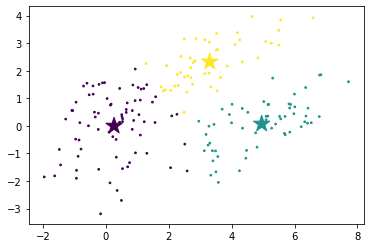

In [6]:
global_k = 3
KMs = k_means(data = data, d = data.shape[1], k = global_k, tol = 0.01, max_iter = 100)

# plot
KMs.plot_clusters()
pred_label = KMs.labels
# print(pred_label)

# report adjusted rand score (ARS)
KMs_metrics = clustering_eval_metrics(pred_label, true_labels)
KMs_metrics.contingency_matrix()
print(f"It's reported the adjusted rand score of my K-means algorithm = {KMs_metrics.adjusted_rand_score()}")

### 4.2a Apply pam method (set k=3) to the simulated data set. Plot different clusters and their centers using the L_p "norm" when p=.1 and p=2. Also calculate the adjusted rand score.

The K-means algorithm is converged at iteration number = 6
It's reported the adjusted rand score of my K-medoid algorithm with p = 0.1 is 0.31134727652258565


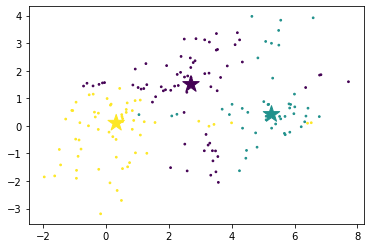

In [7]:
k_medoid_1 = pam(data = data, d = data.shape[1], k = global_k, tol = 0.01, max_iter = 100, p = 0.1)

# plot
k_medoid_1.initialize_centers(1)
k_medoid_1.plot_clusters()
pred_label = k_medoid_1.labels
# print(pred_label)

# report adjusted rand score (ARS)
KMs_metrics = clustering_eval_metrics(pred_label, true_labels)
KMs_metrics.contingency_matrix()
print(f"It's reported the adjusted rand score of my K-medoid algorithm with p = 0.1 is {KMs_metrics.adjusted_rand_score()}")

The K-means algorithm is converged at iteration number = 8
It's reported the adjusted rand score of my K-medoid algorithm with p = 2.0 is  0.7232645104423574


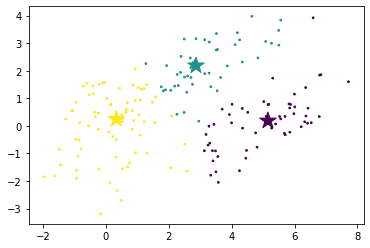

In [8]:
k_medoid_2 = pam(data = data, d = data.shape[1], k = global_k, tol = 0.01, max_iter = 100, p = 2.0)

# plot
k_medoid_2.initialize_centers(1)
k_medoid_2.plot_clusters()
pred_label = k_medoid_2.labels
# print(pred_label)

# report adjusted rand score (ARS)
KMs_metrics = clustering_eval_metrics(pred_label, true_labels)
KMs_metrics.contingency_matrix()
print(f"It's reported the adjusted rand score of my K-medoid algorithm with p = 2.0 is  {KMs_metrics.adjusted_rand_score()}")

### 4.2b Can you compare these results and analyze the cause of the difference?

**Answer**: 
- From the three plots above, it's summarized that for K-means algorithm and K-medoid algorithm (p = 2.0) the reported ARS were very close (0.738 versus 0.723); However, for K-medoid algorithm (p = 0.1), the reported ARS = 0.311, which indicates a relatively worse performance. 
- For results of K-medoid algorithm, 
    - The major factor that contributed to the differene in performance is the p value of L-p norm. 
    - For p=0.1, since p < 1, which is no longer Euclidean norm, it's Minkowski norm. By the nature of this distance measurement, it lost the local convexity (e.g. p-unit ball around the origin in this metric is "concave"). As our dataset is simulated as normal distribution, which has convex properties, thus for p=0.1 we conclude the poor performance as the boundaries of each cluster were not clear. 
    - For p=2, it's obvious that the convexity of the space holds, thus the performance improved by choosing this p value. 

### 4.3 How to choose k? First interpret the plot that you get from the code below, then come up with a procedure using this plot to find a k. What's k you would like to use? Explain why.

The K-means algorithm is converged at iteration number = 1
The cost of this experiment = 1346.786902898504
The K-means algorithm is converged at iteration number = 7
The cost of this experiment = 594.3502480382805
The K-means algorithm is converged at iteration number = 12
The cost of this experiment = 406.3850086224748
The K-means algorithm is converged at iteration number = 9
The cost of this experiment = 305.0690303670158
The K-means algorithm is converged at iteration number = 5
The cost of this experiment = 223.98912649142298
The K-means algorithm is converged at iteration number = 18
The cost of this experiment = 170.30122476729304
The K-means algorithm is converged at iteration number = 9
The cost of this experiment = 202.01016146860528
The K-means algorithm is converged at iteration number = 21
The cost of this experiment = 135.79086283502755
The K-means algorithm is converged at iteration number = 14
The cost of this experiment = 119.17704631163416
The K-means algorithm is con

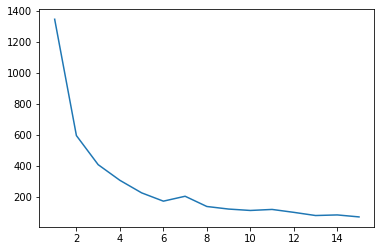

In [9]:
wcss=[]
km = k_means(data, 2, 1, 1e-7, 500)
for i in range(1,16):
    km.k = i
    km.fit_model()
    wcss.append(km.get_cost())
plt.plot(list(range(1,16)), wcss)

**Answer**:
- From the plot above, we saw as k (number of clusters) increase, the cost of the K-means algorithm decrease. That raised in a trade-off between clustering task performance (by cost) and the number of clusters we want to obtain. We want to minimize the cost as well as gain smaller clusters.
- From the print out information, when k = 10, the change of cost is small enough and number of clusters is also not too big. Thus, I pick this k = 10 as optimal k in the analysis. 

## Part 5. Segment Analysis


### About the dataset

		
<h4 align = "center">
Environment Canada    
Monthly Values for July - 2015	
</h4>
<html>
<head>
<style>
table {
    font-family: arial, sans-serif;
    border-collapse: collapse;
    width: 100%;
}

td, th {
    border: 1px solid #dddddd;
    text-align: left;
    padding: 8px;
}

tr:nth-child(even) {
    background-color: #dddddd;
}
</style>
</head>
<body>

<table>
  <tr>
    <th>Name in the table</th>
    <th>Meaning</th>
  </tr>
  <tr>
    <td><font color = "green"><strong>Stn_Name</font></td>
    <td><font color = "green"><strong>Station Name</font</td>
  </tr>
  <tr>
    <td><font color = "green"><strong>Lat</font></td>
    <td><font color = "green"><strong>Latitude (North+, degrees)</font></td>
  </tr>
  <tr>
    <td><font color = "green"><strong>Long</font></td>
    <td><font color = "green"><strong>Longitude (West - , degrees)</font></td>
  </tr>
  <tr>
    <td>Prov</td>
    <td>Province</td>
  </tr>
  <tr>
    <td>Tm</td>
    <td>Mean Temperature (°C)</td>
  </tr>
  <tr>
    <td>DwTm</td>
    <td>Days without Valid Mean Temperature</td>
  </tr>
  <tr>
    <td>D</td>
    <td>Mean Temperature difference from Normal (1981-2010) (°C)</td>
  </tr>
  <tr>
    <td><font color = "black">Tx</font></td>
    <td><font color = "black">Highest Monthly Maximum Temperature (°C)</font></td>
  </tr>
  <tr>
    <td>DwTx</td>
    <td>Days without Valid Maximum Temperature</td>
  </tr>
  <tr>
    <td><font color = "black">Tn</font></td>
    <td><font color = "black">Lowest Monthly Minimum Temperature (°C)</font></td>
  </tr>
  <tr>
    <td>DwTn</td>
    <td>Days without Valid Minimum Temperature</td>
  </tr>
  <tr>
    <td>S</td>
    <td>Snowfall (cm)</td>
  </tr>
  <tr>
    <td>DwS</td>
    <td>Days without Valid Snowfall</td>
  </tr>
  <tr>
    <td>S%N</td>
    <td>Percent of Normal (1981-2010) Snowfall</td>
  </tr>
  <tr>
    <td><font color = "green"><strong>P</font></td>
    <td><font color = "green"><strong>Total Precipitation (mm)</font></td>
  </tr>
  <tr>
    <td>DwP</td>
    <td>Days without Valid Precipitation</td>
  </tr>
  <tr>
    <td>P%N</td>
    <td>Percent of Normal (1981-2010) Precipitation</td>
  </tr>
  <tr>
    <td>S_G</td>
    <td>Snow on the ground at the end of the month (cm)</td>
  </tr>
  <tr>
    <td>Pd</td>
    <td>Number of days with Precipitation 1.0 mm or more</td>
  </tr>
  <tr>
    <td>BS</td>
    <td>Bright Sunshine (hours)</td>
  </tr>
  <tr>
    <td>DwBS</td>
    <td>Days without Valid Bright Sunshine</td>
  </tr>
  <tr>
    <td>BS%</td>
    <td>Percent of Normal (1981-2010) Bright Sunshine</td>
  </tr>
  <tr>
    <td>HDD</td>
    <td>Degree Days below 18 °C</td>
  </tr>
  <tr>
    <td>CDD</td>
    <td>Degree Days above 18 °C</td>
  </tr>
  <tr>
    <td>Stn_No</td>
    <td>Climate station identifier (first 3 digits indicate   drainage basin, last 4 characters are for sorting alphabetically).</td>
  </tr>
  <tr>
    <td>NA</td>
    <td>Not Available</td>
  </tr>


</table>

</body>
</html>

 

In [10]:
filename='weather.csv'
df = pd.read_csv(filename)
df = df[pd.notnull(df["Tm"])]
df = df.reset_index(drop=True)
df.head(5)

,Stn_Name,Lat,Long,Prov,Tm,DwTm,D,Tx,DwTx,Tn,...,DwP,P%N,S_G,Pd,BS,DwBS,BS%,HDD,CDD,Stn_No
0,CHEMAINUS,48.935,-123.742,BC,8.2,0.0,NaN,13.5,0.0,1.0,...,0.0,NaN,0.0,12.0,NaN,NaN,NaN,273.3,0.0,1011500
1,COWICHAN LAKE FORESTRY,48.824,-124.133,BC,7.0,0.0,3.0,15.0,0.0,-3.0,...,0.0,104.0,0.0,12.0,NaN,NaN,NaN,307.0,0.0,1012040
2,LAKE COWICHAN,48.829,-124.052,BC,6.8,13.0,2.8,16.0,9.0,-2.5,...,9.0,NaN,NaN,11.0,NaN,NaN,NaN,168.1,0.0,1012055
3,DUNCAN KELVIN CREEK,48.735,-123.728,BC,7.7,2.0,3.4,14.5,2.0,-1.0,...,2.0,NaN,NaN,11.0,NaN,NaN,NaN,267.7,0.0,1012573
4,ESQUIMALT HARBOUR,48.432,-123.439,BC,8.8,0.0,NaN,13.1,0.0,1.9,...,8.0,NaN,NaN,12.0,NaN,NaN,NaN,258.6,0.0,1012710


### Visualization of the data

C:\Users\Cuuuurry\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Cuuuurry\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  del sys.path[0]


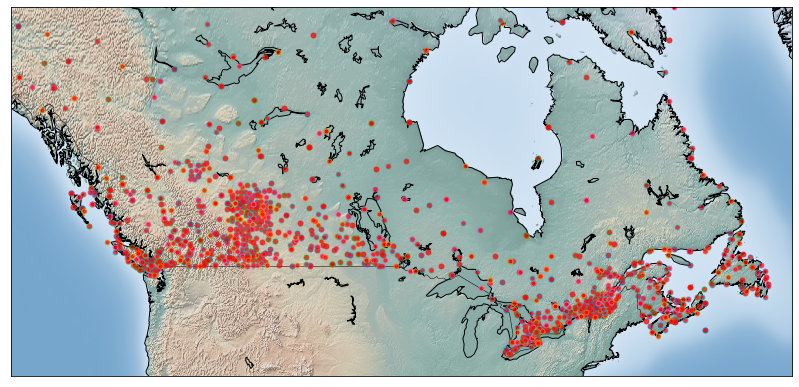

In [11]:
rcParams['figure.figsize'] = (14,10)
llon=-140
ulon=-50
llat=40
ulat=65
df = df[(df['Long'] > llon) & (df['Long'] < ulon) & (df['Lat'] > llat) &(df['Lat'] < ulat)]

my_map = Basemap(projection='merc',
            resolution = 'l', area_thresh = 1000.0,
            llcrnrlon=llon, llcrnrlat=llat,
            urcrnrlon=ulon, urcrnrlat=ulat) 
my_map.drawcoastlines()
my_map.drawcountries()
my_map.shadedrelief()


## this is to change longitude and latitude to coordinates

xs,ys = my_map(np.asarray(df.Long), np.asarray(df.Lat))
df['xm']= xs.tolist()
df['ym'] =ys.tolist()

# plot the stations on the map
for index,row in df.iterrows():
    my_map.plot(row.xm, row.ym,markerfacecolor =([1,0,0]),  marker='o', markersize= 5, alpha = 0.75)
plt.show()

### In the following, you'll work on two datasets data1 (segmentation based on location data only) and data2 (segmentation based on location data as well as the temperature data) to perform k means methods with an appropriate k to do clustering and then label the clusters on two separate maps. You need to justify every decisions you make by appropriate plots or reasoning. 

In [12]:
## do not change anything in this block
data1= df[['xm','ym']].to_numpy()
data2 = df[['xm','ym','Tx','Tm','Tn']].to_numpy()

data1 = np.nan_to_num(data1)
data1 = StandardScaler().fit_transform(data1)
data2 = np.nan_to_num(data2)
data2 = StandardScaler().fit_transform(data2)

The K-means algorithm is converged at iteration number = 1
The cost of this experiment = 2377.9999999999986
The K-means algorithm is converged at iteration number = 6
The cost of this experiment = 951.8502235612457
The K-means algorithm is converged at iteration number = 15
The cost of this experiment = 545.435367019286
The K-means algorithm is converged at iteration number = 9
The cost of this experiment = 455.12469631664965
The K-means algorithm is converged at iteration number = 20
The cost of this experiment = 405.9667131750521
The K-means algorithm is converged at iteration number = 12
The cost of this experiment = 288.8305181314544
The K-means algorithm is converged at iteration number = 14
The cost of this experiment = 230.3978776061546
The K-means algorithm is converged at iteration number = 18
The cost of this experiment = 208.77947372754207
The K-means algorithm is converged at iteration number = 35
The cost of this experiment = 193.1199097596788
The K-means algorithm is conv

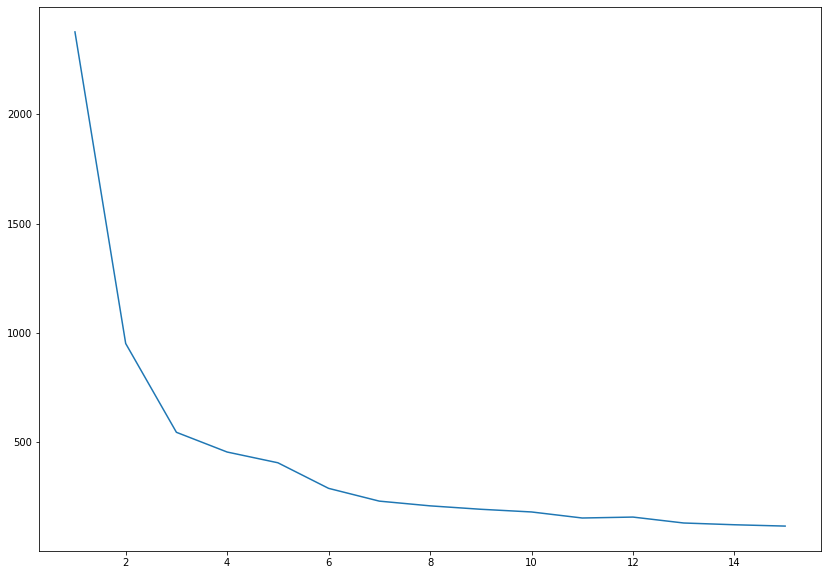

In [13]:
# for the choice of k for data 1
# compute and plot the k's versus cost
wcss=[]
km = k_means(data1, data1.shape[0], 1, 1e-7, 500)
for i in range(1,16):
    km.k = i
    km.fit_model()
    wcss.append(km.get_cost())
plt.plot(list(range(1,16)), wcss)

**Note**: From the behavior of the above curve, based on the reasoning same as Part 4.3, I choose the optimal k = 10 to plot the following map.

The K-means algorithm is converged at iteration number = 15


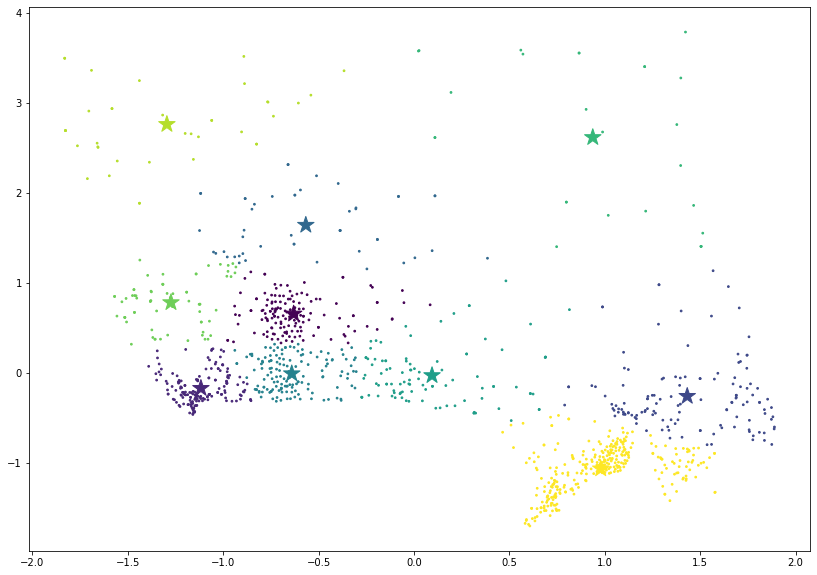

In [14]:
KMs_data1 = k_means(data1, data1.shape[1], 10, 1e-7, 500)

# plot
KMs_data1.plot_clusters()

The K-means algorithm is converged at iteration number = 1
The cost of this experiment = 5945.000000000011
The K-means algorithm is converged at iteration number = 13
The cost of this experiment = 3178.4805243694104
The K-means algorithm is converged at iteration number = 14
The cost of this experiment = 2118.1869424793454
The K-means algorithm is converged at iteration number = 39
The cost of this experiment = 1522.6370998810037
The K-means algorithm is converged at iteration number = 45
The cost of this experiment = 1234.7690505415935
The K-means algorithm is converged at iteration number = 8
The cost of this experiment = 1040.4730332420556
The K-means algorithm is converged at iteration number = 33
The cost of this experiment = 944.1021092799958
The K-means algorithm is converged at iteration number = 11
The cost of this experiment = 777.27391810848
The K-means algorithm is converged at iteration number = 28
The cost of this experiment = 679.2699277225765
The K-means algorithm is co

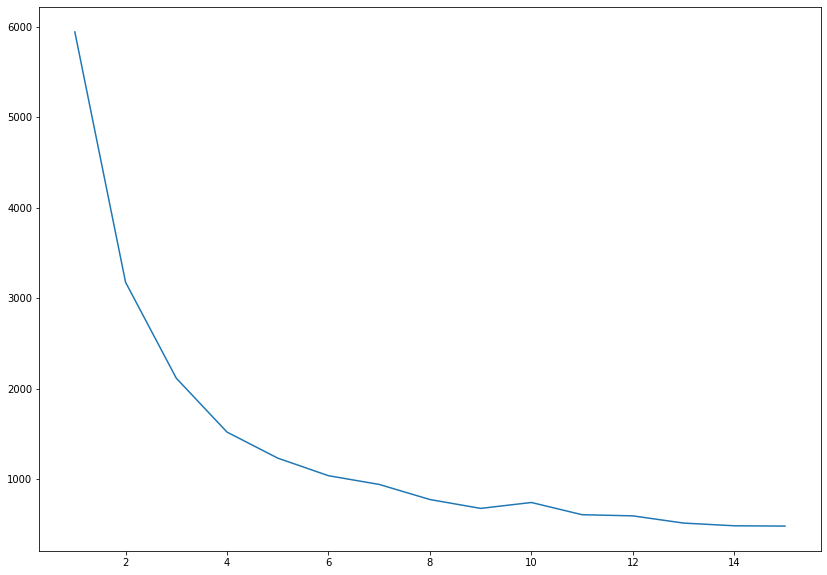

In [15]:
# for the choice of k for data 2
# compute and plot the k's versus cost
wcss=[]
km = k_means(data2, data2.shape[0], 1, 1e-7, 500)
for i in range(1,16):
    km.k = i
    km.fit_model()
    wcss.append(km.get_cost())
plt.plot(list(range(1,16)), wcss)

**Note**: From the behavior of the above curve, based on the reasoning same as Part 4.3, I choose the optimal k = 10 to plot the following map.

The K-means algorithm is converged at iteration number = 36


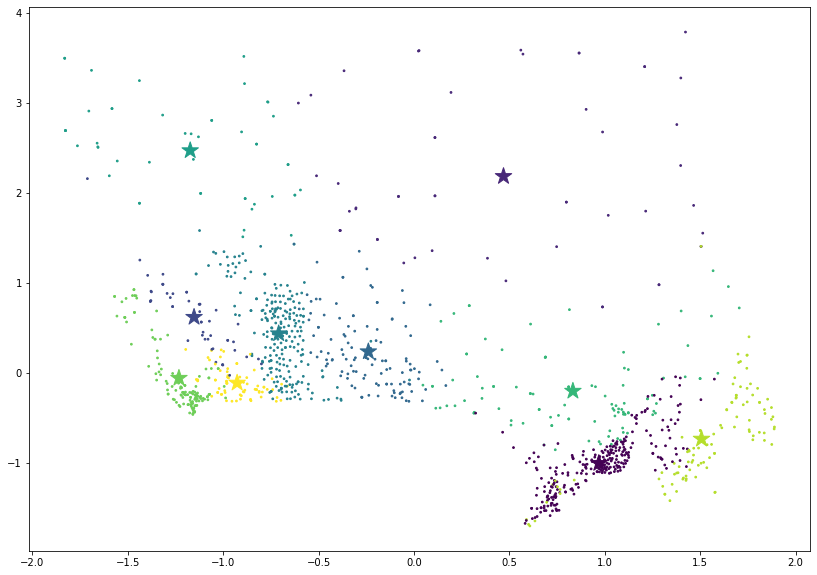

In [16]:
KMs_data2 = k_means(data2, data2.shape[1], 10, 1e-7, 500)

# plot
KMs_data2.fit_model()
plt.scatter(KMs_data2.data[:,0], KMs_data2.data[:,1], c=KMs_data2.labels, s=3)
plt.scatter(np.array(KMs_data2.centers)[:,0], np.array(KMs_data2.centers)[:,1], \
            marker='*',c=list(range(KMs_data2.k)), s=300)

**Answer**:
- By providing the reasoning to choose k, I determined the number of clusters on each datasets.
- The detailed maps were provided as above:
    - First map: with locations only
    - Second map, with locations and temperatures. 

### Add your code for problem 3 from part B below.

In [17]:
# Load the data - see notebook on "Dimension Reduction, PCA, kernel PCA, Part 1"

# put your code here
import pandas as pd
df_arrest = pd.read_csv('./USArrests.csv', index_col=0)

# Get number of states 
states = df_arrest.index.get_values()  

C:\Users\Cuuuurry\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  


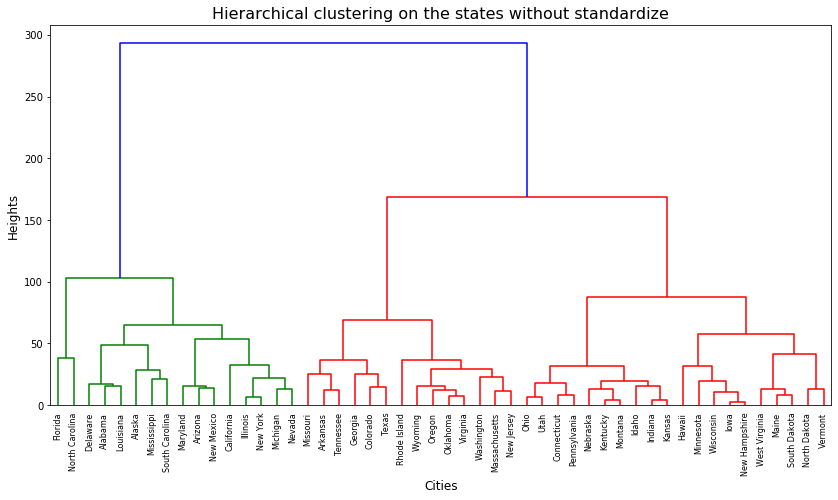

In [18]:
# Peform hierarchical clustering on the states using complete linkage clustering 
# (using Euclidean distance) and plot the corresponding denrogram
from scipy.cluster.hierarchy import dendrogram, linkage

hcluster_model_1 = linkage(df_arrest, method='complete', metric='euclidean')

# plot denrogram
plt.figure(figsize=(14, 7))
plt.xlabel('Cities', size=12)
plt.ylabel('Heights', size=12)
plt.title("Hierarchical clustering on the states without standardize", size=16)
dendrogram(hcluster_model_1, labels=states)
plt.show()

In [19]:
# Find the states in each cluster and print them
from scipy.cluster.hierarchy import cut_tree

# Cut the dendrogram at a height that results in three distinct clusters
clusters = cut_tree(hcluster_model_1, n_clusters=3)

# Which states belong to which cluster
df_clusters = pd.DataFrame(clusters, states, columns=["Clusters"])
df_clusters

,Clusters
Alabama,0
Alaska,0
Arizona,0
Arkansas,1
California,0
Colorado,1
Connecticut,2
Delaware,0
Florida,0
Georgia,1


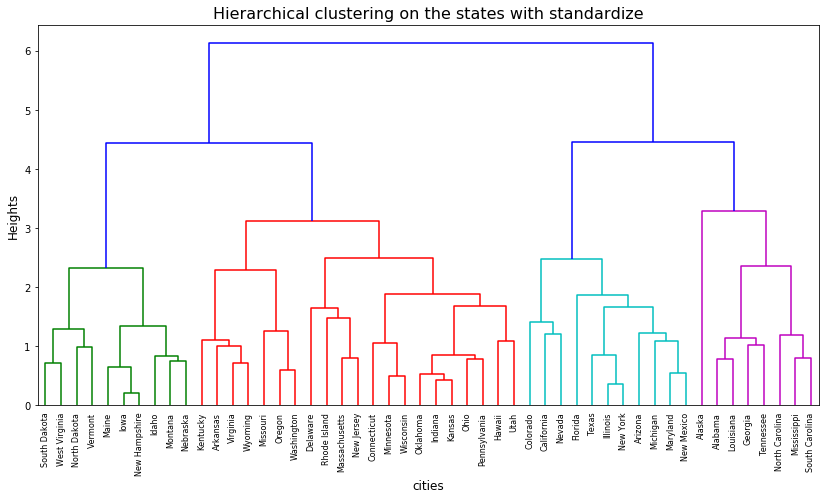

In [20]:
# Now standardize the data and perform hierarchical clustering as above

# Firstly standardize the dataset 
from sklearn.preprocessing import StandardScaler
df_arrest_stan = StandardScaler().fit_transform(df_arrest)

# perfrom the same analysis as above 
hcluster_model_2 = linkage(df_arrest_stan, method='complete', metric='euclidean')

# plot denrogram
plt.figure(figsize=(14, 7))
plt.xlabel('cities', size=12)
plt.ylabel('Heights', size=12)
plt.title("Hierarchical clustering on the states with standardize", size=16)
dendrogram(hcluster_model_2, labels=states)
plt.show()

In [21]:
# Find a "reasonable" partition by considering the dedrogram

# repeat the step above
new_clusters = cut_tree(hcluster_model_2, n_clusters=3)
df_clusters["New Clusters"] = np.array(new_clusters)
df_clusters

,Clusters,New Clusters
Alabama,0,0
Alaska,0,0
Arizona,0,1
Arkansas,1,2
California,0,1
Colorado,1,1
Connecticut,2,2
Delaware,0,2
Florida,0,1
Georgia,1,0


**Put your answer to Problem 3, part (d) here:**



**Answer**:
- From the above hierarchical clustering results, we found that using scaled variables showed more  dissimilaritie than using non-scaled variables.
- The non-scaled dataset was more sensitive to the extreme values in corresponding variables (such as "urbanpop"), by scaling the data this quantity effects between each variables would be overcome. In conclusion, the variables should be scaled before the inter-observation dissimilarities are compute.

## <font color="blue"> Submit both a pdf file and your original jupyter notebook on canvas.</font>